**Introduction on Image Segmentation**

[Cat & Dog]

https://editor.analyticsvidhya.com/uploads/70077Screenshot%20from%202022-04-10%2013-37-37.png

Suppose we have this image and the question that we are trying to solve is, what is the object present in this image. The object of importance here is the dog. Now, this looks like a simple enough problem, right?

This is an image classification problem. Now, instead of having a single object in the image, we can have multiple objects so our question would change accordingly.

Image Segmentation
That is, what are the objects present in the image? The answer to this would be a Dog and a Cat. This is a multi-class classification task. We can identify what objects are present in the image. We can build a bounding box around the objects.

In the above image, we find a Cat & a Dog. We built a red and blue box around them respectively. But what if the question is what is the location of each pixel of the found objects?

We can identify every pixel that represents the object. In simple words, instead of building a rough rectangular box around the object, we build a polygon around the object and color each pixel of that object.

https://www.analyticsvidhya.com/blog/2022/05/introduction-to-image-segmentation/

**how does image segmentation work?**

An image is a collection or set of different pixels. We group together the pixels that have similar attributes using image segmentation.

Object detection builds a bounding box corresponding to each class in the image. But it tells us nothing about the shape of the object. 

Image segmentation creates a pixel-wise mask for each object in the image. This technique gives us a far more granular understanding of the object(s) in the image.


**Why do we need Image Segmentation?**

When the shape of the objet to be detected matters, then OD fails and hence Image Segmentation. Like the shape of cancerous cells.

**The Different Types of Image Segmentation**



1.   Semantic Segmentation : Objects of the same class are masked with same colour.
2.   Instance  Segmentation: Different objects of same class are coloured differently.



## **Region-based Segmentation**

One simple way to segment different objects could be to use their pixel values. An important point to note – the pixel values will be different for the objects and the image’s background if there’s a sharp contrast between them.

In this case, we can set a threshold value. The pixel values falling below or above that threshold can be classified accordingly (as an object or the background). This technique is known as **Threshold Segmentation**.

If we want to divide the image into two regions (object and background), we define a single threshold value. This is known as the **global threshold**.

 

If we have multiple objects along with the background, we must define multiple thresholds. These thresholds are collectively known as the **local threshold**.

In [2]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

(192, 263, 3)


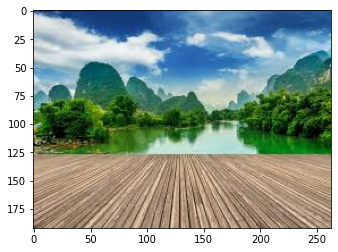

In [4]:
image = plt.imread('1.jpeg')
print(image.shape)
plt.imshow(image)

In [5]:
grey = rgb2gray(image)

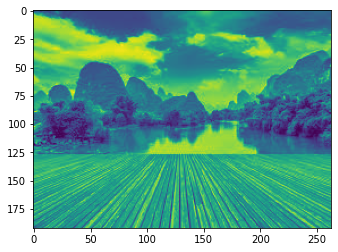

In [6]:
plt.imshow(grey)

In [16]:
grey.shape

(192, 263)

(192, 263)


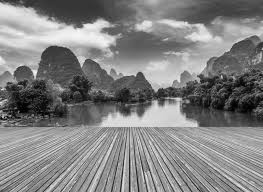

In [25]:
from google.colab.patches import cv2_imshow
img = cv2.imread('1.jpeg', cv2.IMREAD_UNCHANGED)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray.shape)
cv2_imshow(gray)

**We will take the mean of the pixel values and use that as a threshold**. If the pixel value is more than our threshold, we can say that it belongs to an object. If the pixel value is less than the threshold, it will be treated as the background.

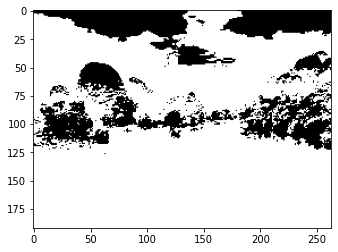

In [26]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

Nice! The darker region (black) represents the background and the brighter (white) region is the foreground. We can define multiple thresholds as well to detect multiple objects:

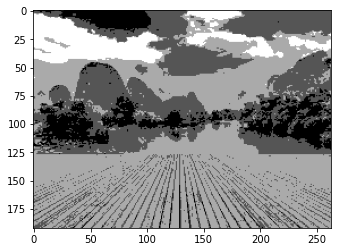

In [27]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

**advantages of this method are:**

Calculations are simpler
Fast operation speed
When the object and background have high contrast, this method performs really well
But there are some **limitations** to this approach. When we don’t have significant grayscale difference, or there is an overlap of the grayscale pixel values, it becomes very difficult to get accurate segments

## **Edge Detection Segmentation**

What divides two objects in an image? There is always an edge between two adjacent regions with different grayscale values (pixel values). ***The edges can be considered as the discontinuous local features of an image***.

We can make use of this discontinuity to detect edges and hence define a boundary of the object. This helps us in *detecting the shapes of multiple objects present in a given image*. Now the question is how can we detect these edges? This is where we can make use of **filters** and **convolutions**.

* Take the weight matrix
* Put it on top of the image
* Perform element-wise multiplication and get the output
* Move the weight matrix as per the stride chosen
* Convolve until all the pixels of the input are used

sobel operator: It is typically used to detect edges. The sobel operator has two weight matrices – one for detecting horizontal edges and the other for detecting vertical edges.

In [29]:
# converting to grayscale
gray = rgb2gray(image)

# defining the sobel filters
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
print(sobel_horizontal, 'is a kernel for detecting horizontal edges')
 
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
print(sobel_vertical, 'is a kernel for detecting vertical edges')

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] is a kernel for detecting horizontal edges
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] is a kernel for detecting vertical edges


Now, convolve this filter over the image using the convolve function of the ndimage package from scipy.

In [30]:
out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')
# here mode determines how the input array is extended when the filter overlaps a border.

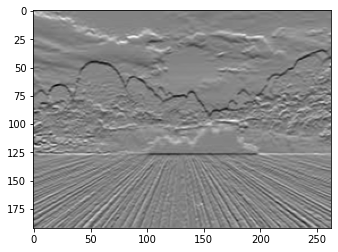

In [31]:
plt.imshow(out_h, cmap='gray')

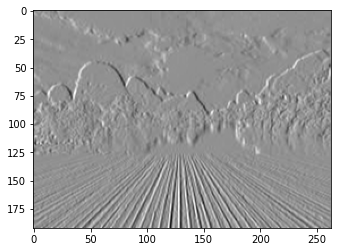

In [34]:
plt.imshow(out_v, cmap='gray')

filter that can detect both horizontal and vertical edges at the same time. This is called the laplace operator:

In [35]:
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
print(kernel_laplace, 'is a laplacian kernel')

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]] is a laplacian kernel


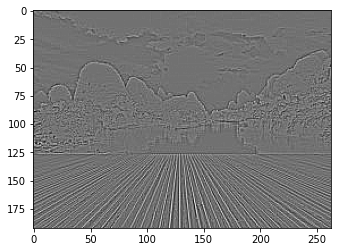

In [36]:
out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')

# Image Segmentation based on Clustering

**Clustering** is the task of dividing the population (data points) into a number of groups, such that data points in the same groups are more similar to other data points in that same group than those in other groups. These groups are known as clusters.

One of the most commonly used clustering algorithms is **k-means**. Here, the k represents the number of clusters (not to be confused with k-nearest neighbor). Let’s understand how k-means works:

* 1 First, randomly select k initial clusters
* 2 Randomly assign each data point to any one of the k clusters
* 3 Calculate the centers of these clusters
* 4 Calculate the distance of all the points from the center of each cluster
* 5 Depending on this distance, the points are reassigned to the nearest cluster
* 6 Calculate the center of the newly formed clusters
* 7 Finally, repeat steps (4), (5) and (6) until either the center of the clusters does not change or we reach the set number of iterations

(192, 263, 3)


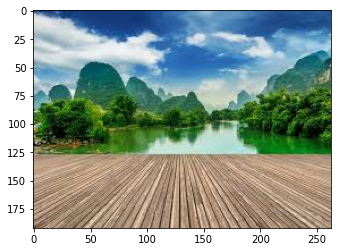

In [37]:
pic = plt.imread('1.jpeg')/255  # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic)

It’s a 3-dimensional image of shape (192, 263, 3). For clustering the image using k-means, we first need to convert it into a 2-dimensional array whose shape will be (length*width, channels). In our example, this will be (192*263, 3).

In [38]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape


(50496, 3)

In [44]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

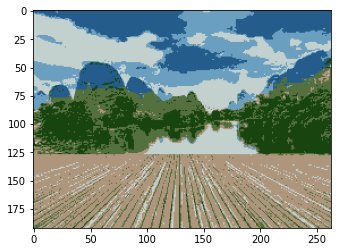

In [45]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)

k-means works really well when we have a small dataset. It can segment the objects in the image and give impressive results. But the algorithm hits a roadblock when applied on a large dataset (more number of images).

It looks at all the samples at every iteration, so the time taken is too high.